In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None

In [216]:
df = pd.read_fwf('Ficheros/CME/CME_all.txt', skiprows = 4, header = None)


In [217]:
! cat "Ficheros/CME/CME_all.txt" | head

 ========= SOHO/LASCO CME CATALOG==========      LAST UPDATED: 2020/03/17 11:51
 Date       Time     Central  Width  Linear   2nd order speed      Accel     Mass      Kinetic    MPA   Remarks
                        PA           Speed  initial final   20R                        Energy                 

1996/01/11  00:14:36    267     18    499     571    426      0    -64.3*   -------    -------    272   Only C3
1996/01/13  22:08:30    265     16    290     278    303    372      2.8*   -------    -------    266   Only C3
1996/01/15  07:01:10    262     43    525     600    454      0    -31.1    -------    -------    272   Only C3
1996/01/22  03:11:01    105     37    267     401    130      0   -126.3*   7.1e+13*   2.5e+28*   103   Very Poor Event; Only C3
1996/01/26  09:16:19     90     27    262     254    271    322      1.9*   3.0e+14    1.0e+29     90   Poor Event; Only C3
1996/01/31  06:52:13    274     47    158     219     99      0    -12.3*   2.5e+14*   3.2e+28*   272   Poo

In [218]:
columnas = ['Date', 'Time', 'Central_PA', 'Width', 'L_speed', '2_I_speed', '2_F_speed', '2_20R_speed', 'Acceleration',
           'Mass', 'K_energy', 'MPA', 'Remarks']
df = pd.read_fwf('Ficheros/CME/univ_all.txt', skiprows = 4, header = None, names = columnas, index_col = False,
                na_values = [0, '', '--', '---', '----', '-----', '------', '-------', '********'])

In [219]:
df

,Date,Time,Central_PA,Width,L_speed,2_I_speed,2_F_speed,2_20R_speed,Acceleration,Mass,K_energy,MPA,Remarks
0,1996/01/11,00:14:36,267,18,499.0,571.0,426.0,NaN,-64.3*,NaN,NaN,272.0,Only C3
1,1996/01/13,22:08:30,265,16,290.0,278.0,303.0,372.0,2.8*,NaN,NaN,266.0,Only C3
2,1996/01/15,07:01:10,262,43,525.0,600.0,454.0,NaN,-31.1,NaN,NaN,272.0,Only C3
3,1996/01/22,03:11:01,105,37,267.0,401.0,130.0,NaN,-126.3*,7.1e+13*,2.5e+28*,103.0,Very Poor Event; Only C3
4,1996/01/26,09:16:19,90,27,262.0,254.0,271.0,322.0,1.9*,3.0e+14,1.0e+29,90.0,Poor Event; Only C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30316,2020/05/29,11:24:05,84,52,347.0,406.0,288.0,NaN,-21.9*,NaN,NaN,68.0,Poor Event; Only C2
30317,2020/05/29,15:12:05,83,46,204.0,215.0,193.0,NaN,-2.8*,NaN,NaN,74.0,Poor Event; Only C2
30318,2020/05/29,17:36:05,76,34,210.0,295.0,120.0,NaN,-19.3*,NaN,NaN,73.0,Poor Event; Only C2
30319,2020/05/30,01:25:43,80,39,269.0,203.0,339.0,331.0,2.8,NaN,NaN,86.0,NaN


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30321 entries, 0 to 30320
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          30321 non-null  object 
 1   Time          30321 non-null  object 
 2   Central_PA    30273 non-null  object 
 3   Width         30321 non-null  int64  
 4   L_speed       30213 non-null  float64
 5   2_I_speed     28997 non-null  float64
 6   2_F_speed     29756 non-null  float64
 7   2_20R_speed   23256 non-null  float64
 8   Acceleration  29831 non-null  object 
 9   Mass          19738 non-null  object 
 10  K_energy      19706 non-null  object 
 11  MPA           30299 non-null  float64
 12  Remarks       21109 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 3.0+ MB


In [221]:
df.head()

,Date,Time,Central_PA,Width,L_speed,2_I_speed,2_F_speed,2_20R_speed,Acceleration,Mass,K_energy,MPA,Remarks
0,1996/01/11,00:14:36,267,18,499.0,571.0,426.0,NaN,-64.3*,NaN,NaN,272.0,Only C3
1,1996/01/13,22:08:30,265,16,290.0,278.0,303.0,372.0,2.8*,NaN,NaN,266.0,Only C3
2,1996/01/15,07:01:10,262,43,525.0,600.0,454.0,NaN,-31.1,NaN,NaN,272.0,Only C3
3,1996/01/22,03:11:01,105,37,267.0,401.0,130.0,NaN,-126.3*,7.1e+13*,2.5e+28*,103.0,Very Poor Event; Only C3
4,1996/01/26,09:16:19,90,27,262.0,254.0,271.0,322.0,1.9*,3.0e+14,1.0e+29,90.0,Poor Event; Only C3


In [222]:
df.isna().sum()

Date                0
Time                0
Central_PA         48
Width               0
L_speed           108
2_I_speed        1324
2_F_speed         565
2_20R_speed      7065
Acceleration      490
Mass            10583
K_energy        10615
MPA                22
Remarks          9212
dtype: int64

In [223]:
df.Central_PA[df.Central_PA == 'Halo'] = 360

/home/jmpinop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [224]:
df['Central_PA'] = df['Central_PA'].astype(float)

In [225]:
df['Central_PA'].fillna(method = 'ffill', inplace = True)
df['L_speed'].fillna(method = 'ffill', inplace = True)
df['2_I_speed'].fillna(method = 'ffill', inplace = True)
df['2_F_speed'].fillna(method = 'ffill', inplace = True)
df['2_20R_speed'].fillna(method = 'ffill', inplace = True)
df['2_20R_speed'].fillna(method = 'bfill', inplace = True)
df['Acceleration'].fillna(method = 'ffill', inplace = True)
df['MPA'].fillna(method = 'ffill', inplace = True)

In [226]:
df.drop(['Time'], axis = 'columns', inplace = True)
df.drop(['Remarks'], axis = 'columns', inplace = True)
df.drop(['Mass'], axis = 'columns', inplace = True)
df.drop(['L_speed'], axis = 'columns', inplace = True)

In [227]:
df.dropna(inplace = True)

In [228]:
df['Acceleration'] = df['Acceleration'].str.rstrip('*')
df['Acceleration'] = df['Acceleration'].astype(float)
df['K_energy'] = df['K_energy'].str.rstrip('*')
df['K_energy'] = df['K_energy'].astype(float)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19706 entries, 3 to 30123
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          19706 non-null  object 
 1   Central_PA    19706 non-null  float64
 2   Width         19706 non-null  int64  
 3   2_I_speed     19706 non-null  float64
 4   2_F_speed     19706 non-null  float64
 5   2_20R_speed   19706 non-null  float64
 6   Acceleration  19706 non-null  float64
 7   K_energy      19706 non-null  float64
 8   MPA           19706 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.5+ MB


In [230]:
df

,Date,Central_PA,Width,2_I_speed,2_F_speed,2_20R_speed,Acceleration,K_energy,MPA
3,1996/01/22,105.0,37,401.0,130.0,372.0,-126.3,2.500000e+28,103.0
4,1996/01/26,90.0,27,254.0,271.0,322.0,1.9,1.000000e+29,90.0
5,1996/01/31,274.0,47,219.0,99.0,322.0,-12.3,3.200000e+28,272.0
6,1996/02/03,83.0,52,294.0,317.0,309.0,0.9,8.900000e+29,80.0
7,1996/02/08,263.0,70,247.0,126.0,309.0,-6.0,2.700000e+28,249.0
...,...,...,...,...,...,...,...,...,...
30116,2019/12/26,99.0,58,196.0,104.0,1903.0,-11.1,9.200000e+27,109.0
30119,2019/12/27,302.0,21,62.0,779.0,2036.0,171.2,1.200000e+28,296.0
30121,2019/12/27,284.0,46,488.0,405.0,136.0,-9.1,5.900000e+28,289.0
30122,2019/12/30,277.0,39,29.0,75.0,195.0,1.6,6.900000e+27,278.0


In [231]:
df['Date2'] = pd.to_datetime(df['Date'])

In [232]:
df.drop(['Date'], axis = 'columns', inplace = True)


In [233]:
df

,Central_PA,Width,2_I_speed,2_F_speed,2_20R_speed,Acceleration,K_energy,MPA,Date2
3,105.0,37,401.0,130.0,372.0,-126.3,2.500000e+28,103.0,1996-01-22
4,90.0,27,254.0,271.0,322.0,1.9,1.000000e+29,90.0,1996-01-26
5,274.0,47,219.0,99.0,322.0,-12.3,3.200000e+28,272.0,1996-01-31
6,83.0,52,294.0,317.0,309.0,0.9,8.900000e+29,80.0,1996-02-03
7,263.0,70,247.0,126.0,309.0,-6.0,2.700000e+28,249.0,1996-02-08
...,...,...,...,...,...,...,...,...,...
30116,99.0,58,196.0,104.0,1903.0,-11.1,9.200000e+27,109.0,2019-12-26
30119,302.0,21,62.0,779.0,2036.0,171.2,1.200000e+28,296.0,2019-12-27
30121,284.0,46,488.0,405.0,136.0,-9.1,5.900000e+28,289.0,2019-12-27
30122,277.0,39,29.0,75.0,195.0,1.6,6.900000e+27,278.0,2019-12-30


In [234]:
df.dtypes

Central_PA             float64
Width                    int64
2_I_speed              float64
2_F_speed              float64
2_20R_speed            float64
Acceleration           float64
K_energy               float64
MPA                    float64
Date2           datetime64[ns]
dtype: object

In [235]:
df = df.rename(columns={'Date2':'Date'})

In [236]:
grouped = df.groupby('Date')

In [237]:
grouped2 = grouped.mean()

In [238]:
grouped.mean().reset_index

<bound method DataFrame.reset_index of             Central_PA  Width  2_I_speed  2_F_speed  2_20R_speed  \
Date                                                               
1996-01-22       105.0   37.0      401.0      130.0        372.0   
1996-01-26        90.0   27.0      254.0      271.0        322.0   
1996-01-31       274.0   47.0      219.0       99.0        322.0   
1996-02-03        83.0   52.0      294.0      317.0        309.0   
1996-02-08       263.0   70.0      247.0      126.0        309.0   
...                ...    ...        ...        ...          ...   
2019-12-24       282.0   57.0      157.0      288.0        615.0   
2019-12-25       274.0   49.0      337.0      245.0       1903.0   
2019-12-26        99.0   58.0      196.0      104.0       1903.0   
2019-12-27       293.0   33.5      275.0      592.0       1086.0   
2019-12-30       266.5   61.0       20.5      132.0        222.5   

            Acceleration      K_energy    MPA  
Date                        

In [239]:
grouped2 =grouped2.reset_index()

In [240]:
grouped2.describe()

,Central_PA,Width,2_I_speed,2_F_speed,2_20R_speed,Acceleration,K_energy,MPA
count,6553.000000,6553.000000,6553.000000,6553.000000,6553.000000,6553.000000,6.553000e+03,6553.000000
mean,185.250155,69.490918,359.203055,393.939621,545.972617,2.270486,5.627735e+30,180.308322
std,74.088854,47.728418,232.638541,203.565898,288.704705,20.753967,6.421144e+31,72.388486
min,1.000000,11.000000,2.000000,9.000000,21.000000,-232.000000,5.500000e+24,1.000000
25%,126.250000,40.000000,210.000000,265.500000,368.000000,-3.840000,6.700000e+28,120.600000
50%,186.250000,57.000000,312.666667,361.666667,496.600000,1.833333,3.855000e+29,181.250000
75%,245.000000,82.000000,454.000000,478.600000,653.000000,7.200000,1.968700e+30,239.333333
max,360.000000,360.000000,3703.000000,2558.000000,3728.000000,446.100000,4.200000e+33,359.000000


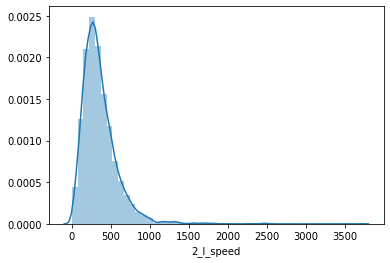

In [241]:
sns.distplot(grouped2['2_I_speed'])

In [242]:
len(grouped2[grouped2['2_I_speed'] > 1100])

77

In [243]:
grouped2.drop(grouped2[grouped2['2_I_speed'] >= 1100].index, inplace =True)

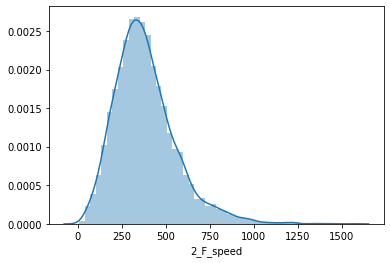

In [244]:
sns.distplot(grouped2['2_F_speed'])

In [245]:
len(grouped2[grouped2['2_F_speed'] > 1000])

37

In [246]:
grouped2.drop(grouped2[grouped2['2_F_speed'] >= 1000].index, inplace =True)

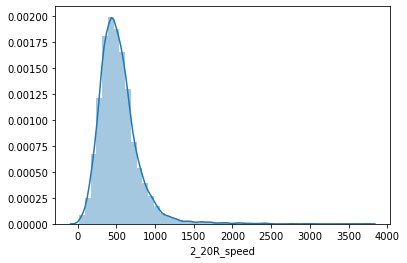

In [247]:
sns.distplot(grouped2['2_20R_speed'])

In [248]:
len(grouped2[grouped2['2_20R_speed'] > 1500])

64

In [249]:
grouped2.drop(grouped2[grouped2['2_20R_speed'] >= 1500].index, inplace =True)

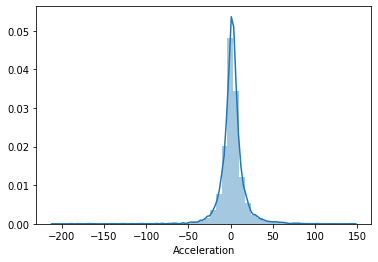

In [250]:
sns.distplot(grouped2['Acceleration'])

In [251]:
grouped2.drop(['Acceleration'], axis = 'columns', inplace = True)

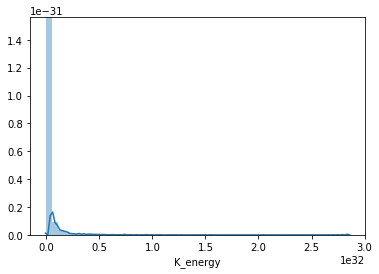

In [252]:
sns.distplot(grouped2['K_energy'])

In [253]:
grouped2.K_energy.min()

5.5e+24

In [254]:
df = grouped2

In [255]:
grouped2.K_energy.max()

2.85335e+32

In [256]:
cond1 = (df['K_energy'] > 1e+24) & (df['K_energy'] < 1e+25) 
cond2 = (df['K_energy'] >= 1e+25) & (df['K_energy'] < 1e+26) 
cond3 = (df['K_energy'] >= 1e+26) & (df['K_energy'] < 1e+27)
cond4 = (df['K_energy'] >= 1e+27) & (df['K_energy'] < 1e+28) 
cond5 = (df['K_energy'] >= 1e+28) & (df['K_energy'] < 1e+29) 
cond6 = (df['K_energy'] >= 1e+29) & (df['K_energy'] < 1e+30)
cond7 = (df['K_energy'] >= 1e+30) & (df['K_energy'] < 1e+31) 
cond8 = (df['K_energy'] >= 1e+31) & (df['K_energy'] < 1e+32) 
cond9 = (df['K_energy'] >= 1e+32) 

In [263]:
print(len(df[cond1]), len(df[cond2]), len(df[cond3]), len(df[cond4]), len(df[cond5]), len(df[cond6]), len(df[cond7]),
len(df[cond8]), len(df[cond9]))

0 0 76 450 1397 2222 1807 401 0


/home/jmpinop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/jmpinop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [261]:
df.drop(df[cond1].index, inplace =True)
df.drop(df[cond2].index, inplace =True)
df.drop(df[cond9].index, inplace =True)

/home/jmpinop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/jmpinop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/jmpinop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [264]:
grouped2.K_energy.min()

1e+26

In [265]:
grouped2.K_energy.max()

9.83625e+31

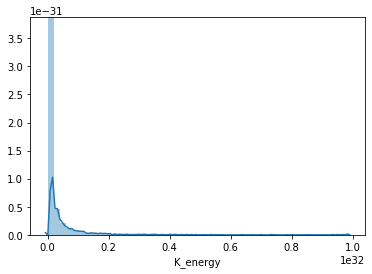

In [262]:
sns.distplot(grouped2['K_energy'])

In [266]:
def Classifier(row):
    result = 0
    if (row['K_energy'] > 1e+26) and (row['K_energy'] < 1e+27):
        result = 1
    elif (row['K_energy'] >= 1e+27) and (row['K_energy'] < 1e+28):
        result = 2
    elif (row['K_energy'] >= 1e+28) and (row['K_energy'] < 1e+29):
        result = 3
    elif (row['K_energy'] >= 1e+29) and (row['K_energy'] < 1e+30):
        result = 4
    elif (row['K_energy'] >= 1e+30) and (row['K_energy'] < 1e+31):
        result = 5
    elif (row['K_energy'] >= 1e+31):
        result = 6
    
    return result
    

In [267]:
df['C1'] = df.apply(Classifier, axis = 1)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6353 entries, 0 to 6552
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         6353 non-null   datetime64[ns]
 1   Central_PA   6353 non-null   float64       
 2   Width        6353 non-null   float64       
 3   2_I_speed    6353 non-null   float64       
 4   2_F_speed    6353 non-null   float64       
 5   2_20R_speed  6353 non-null   float64       
 6   K_energy     6353 non-null   float64       
 7   MPA          6353 non-null   float64       
 8   C1           6353 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 496.3 KB


In [271]:
df[df['C1']==2].sum

<bound method DataFrame.sum of            Date  Central_PA  Width  2_I_speed  2_F_speed  2_20R_speed  \
8    1996-03-02        88.0   36.0       95.0      120.0        177.0   
10   1996-03-06       268.0   55.0      141.0      232.0        215.0   
19   1996-04-08       266.0   29.0      351.0      279.0        330.0   
21   1996-04-13       265.0   39.0      143.0      171.0        190.0   
30   1996-05-14        79.0   54.0      199.0      409.0        600.0   
...         ...         ...    ...        ...        ...          ...   
6538 2019-11-30       101.5   27.5      104.0      430.5       1220.0   
6539 2019-12-01       102.0   36.0      169.0      165.0        120.0   
6541 2019-12-05       286.0   26.0       66.0      118.0        295.0   
6545 2019-12-11       112.0   50.0       85.0      233.0        243.0   
6546 2019-12-17       284.0   53.0      148.0      207.0        440.0   

          K_energy    MPA  C1  
8     8.700000e+27   86.0   2  
10    5.600000e+27  261.0   

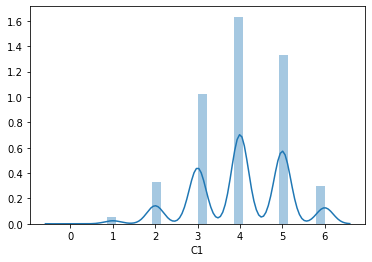

In [272]:
sns.distplot(df['C1'])

In [97]:
df.to_csv('CME_new2.csv', index = False)